In [3268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [3269]:
telco_df = pd.read_csv('C:/Users/marcu/OneDrive/Área de Trabalho/Telco Customer Churn/archive (1)/WA_Fn-UseC_-Telco-Customer-Churn.csv')
mall_df = pd.read_csv('C:/Users/marcu/OneDrive/Área de Trabalho/d-mall_customers/archive (1)/Mall_Customers.csv')

display(telco_df.head(), mall_df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3270]:
# Identificar variáveis categóricas e numéricas nos datasets
telco_categoricals = telco_df.select_dtypes(include='object').columns.tolist()
telco_numericals = telco_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

mall_categoricals = mall_df.select_dtypes(include='object').columns.tolist()
mall_numericals = mall_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Telco Customer Churn:")
print("Categóricas:", telco_categoricals)
print("Numéricas:", telco_numericals)

print("\nMall Customers:")
print("Categóricas:", mall_categoricals)
print("Numéricas:", mall_numericals)



Telco Customer Churn:
Categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

Mall Customers:
Categóricas: ['Gender']
Numéricas: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [3271]:
# Verificar valores ausentes nos datasets
print("Valores ausentes no Telco Customer Churn:")
print(telco_df.isnull().sum())

print("\nValores ausentes no Mall Customers:")
print(mall_df.isnull().sum())



Valores ausentes no Telco Customer Churn:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Valores ausentes no Mall Customers:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [3272]:
# Ajuste da coluna TotalCharges no Telco Customer Churn
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')  # Converter para numérico
telco_df['TotalCharges'] = telco_df['TotalCharges'].fillna(0)  # Substituir valores ausentes por 0
telco_df['TotalCharges'] = telco_df['TotalCharges'].apply(lambda x: max(x, 0))  # Substituir valores negativos por 0

# Verificação após o ajuste da coluna TotalCharges
print("Valores negativos em TotalCharges após ajuste:")
print(telco_df[telco_df['TotalCharges'] < 0])

print("\nValores ausentes em TotalCharges após ajuste:")
print(telco_df[telco_df['TotalCharges'].isna()])

# Converter 'TotalCharges' para numérico
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce').fillna(0)

print("\n'ValueCounts' após a conversão:")
print(telco_df['TotalCharges'].head())

telco_df = telco_df.drop(columns=['customerID'], errors='ignore')

print("Coluna 'customerID' removida com sucesso.")

Valores negativos em TotalCharges após ajuste:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

Valores ausentes em TotalCharges após ajuste:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

'ValueCounts' após a conversão:
0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64
Coluna 'customerID' removida com sucesso.


## Normalização dos dados

In [3273]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

telco_numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Aplicando Min-Max Scaling
scaler_minmax = MinMaxScaler()
telco_df[telco_numeric_columns] = scaler_minmax.fit_transform(telco_df[telco_numeric_columns])

# Aplicando Standardization (Z-Score Normalization)
scaler_standard = StandardScaler()
telco_df[telco_numeric_columns] = scaler_standard.fit_transform(telco_df[telco_numeric_columns])

print(telco_df[telco_numeric_columns].head())

     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.992611
1  0.066327       -0.259629     -0.172165
2 -1.236724       -0.362660     -0.958066
3  0.514251       -0.746535     -0.193672
4 -1.236724        0.197365     -0.938874


## Padronização dos dados

In [3274]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Padronizando as variáveis numéricas
telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']])

print(telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']].head())


     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.992611
1  0.066327       -0.259629     -0.172165
2 -1.236724       -0.362660     -0.958066
3  0.514251       -0.746535     -0.193672
4 -1.236724        0.197365     -0.938874


In [3275]:
print(telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']].mean())
print(telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']].std())

tenure            1.462852e-17
MonthlyCharges    1.916841e-17
TotalCharges      5.296535e-18
dtype: float64
tenure            1.000071
MonthlyCharges    1.000071
TotalCharges      1.000071
dtype: float64


## Codificação de Dados Categóricos

### One-Hot Encoding

In [3276]:
# Identificar variáveis categóricas
telco_categoricals = telco_df.select_dtypes(include='object').columns.tolist()

# Aplicar One-Hot Encoding nas variáveis categóricas
telco_df_encoded = pd.get_dummies(telco_df, columns=telco_categoricals, drop_first=True)

print(telco_df_encoded.head())


   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.277445       -1.160323     -0.992611        False   
1              0  0.066327       -0.259629     -0.172165         True   
2              0 -1.236724       -0.362660     -0.958066         True   
3              0  0.514251       -0.746535     -0.193672         True   
4              0 -1.236724        0.197365     -0.938874        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2             

In [3277]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Identificar variáveis categóricas
telco_categoricals = telco_df.select_dtypes(include='object').columns.tolist()

# Aplicar Label Encoding para cada variável categórica
for col in telco_categoricals:
    telco_df[col] = label_encoder.fit_transform(telco_df[col])

print(telco_df.head())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1     

## Redução de Dimensionalidade

In [3278]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecionando as variáveis numéricas para a aplicação do PCA
telco_numeric_columns = ['tenure', 'MonthlyCharges', 'PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract','MonthlyCharges']  
X_telco = telco_df[telco_numeric_columns]

# Padronização
scaler = StandardScaler()
X_telco_scaled = scaler.fit_transform(X_telco)

# Aplicando o PCA
pca = PCA(n_components=0.8) 
X_telco_pca = pca.fit_transform(X_telco_scaled)

# Exibindo a variância explicada pelos componentes principais
print("Variância explicada pelos componentes principais:", pca.explained_variance_ratio_)
print(telco_df.head())


Variância explicada pelos componentes principais: [0.29231748 0.27169073 0.17372486 0.09235162]
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies

In [3279]:
# Obtendo os loadings dos PCAS
loadings = pd.DataFrame(pca.components_, columns=telco_numeric_columns, index=['PC1', 'PC2', 'PC3', 'PC4'])
print(loadings)


       tenure  MonthlyCharges  PhoneService  InternetService  OnlineSecurity  \
PC1  0.446326        0.532050      0.131578        -0.217013        0.196250   
PC2  0.338944       -0.377727     -0.103740         0.191325        0.381184   
PC3 -0.016352       -0.049761     -0.733222        -0.667896        0.067752   
PC4  0.393425       -0.015045     -0.233249         0.127087       -0.802737   

     TechSupport  Contract  MonthlyCharges  
PC1     0.233265  0.278036        0.532050  
PC2     0.375792  0.515629       -0.377727  
PC3     0.058959 -0.054907       -0.049761  
PC4    -0.149654  0.327758       -0.015045  


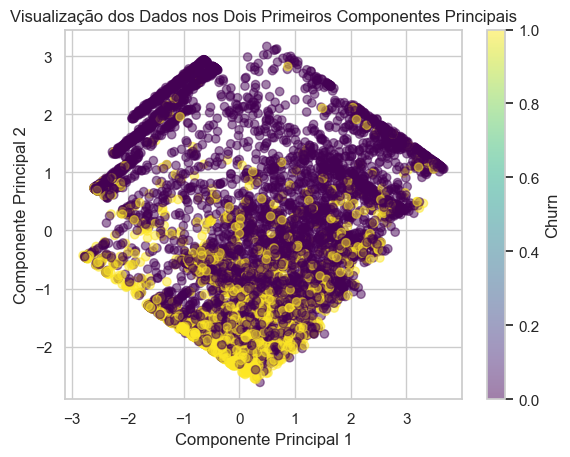

In [3280]:
import matplotlib.pyplot as plt

# Visualização dos dois primeiros componentes
plt.scatter(X_telco_pca[:, 0], X_telco_pca[:, 1], c=telco_df['Churn'], cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Dados nos Dois Primeiros Componentes Principais')
plt.colorbar(label='Churn')
plt.show()


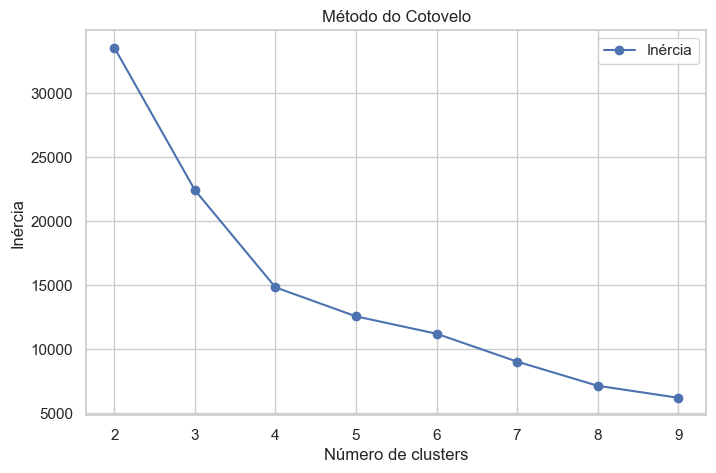

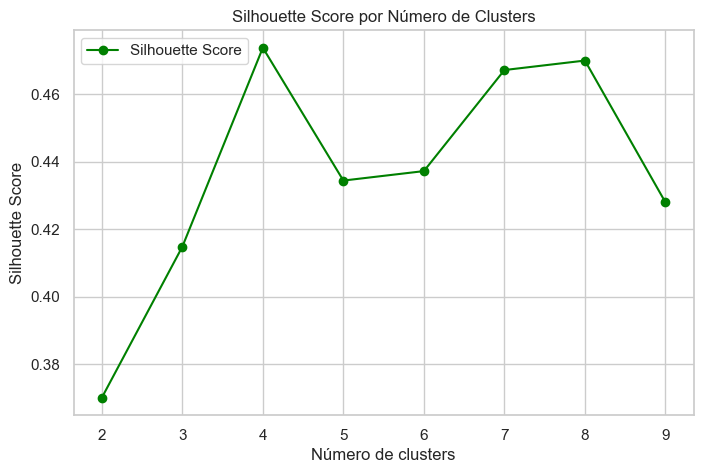

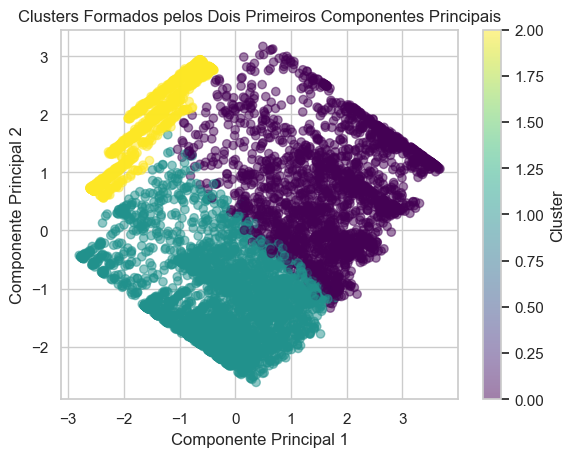

In [3281]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Método do cotovelo
inertia = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_telco_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_telco_pca, kmeans.labels_))

# Plot do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertia, marker='o', label='Inércia')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.legend()
plt.show()

# Plot do score silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', label='Silhouette Score', color='green')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por Número de Clusters')
plt.legend()
plt.show()

# Aplicando K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_telco_pca)

plt.scatter(X_telco_pca[:, 0], X_telco_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters Formados pelos Dois Primeiros Componentes Principais')
plt.colorbar(label='Cluster')
plt.show()


## Detectar Outliers

In [3282]:
numerical_features = telco_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Variáveis numéricas:", numerical_features)

print(telco_df[numerical_features].describe())


Variáveis numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
       SeniorCitizen        tenure  MonthlyCharges  TotalCharges
count    7043.000000  7.043000e+03    7.043000e+03  7.043000e+03
mean        0.162147  1.462852e-17    1.916841e-17  5.296535e-18
std         0.368612  1.000071e+00    1.000071e+00  1.000071e+00
min         0.000000 -1.318165e+00   -1.545860e+00 -1.005780e+00
25%         0.000000 -9.516817e-01   -9.725399e-01 -8.299464e-01
50%         0.000000 -1.372744e-01    1.857327e-01 -3.905282e-01
75%         0.000000  9.214551e-01    8.338335e-01  6.648034e-01
max         1.000000  1.613701e+00    1.794352e+00  2.825806e+00


In [3283]:
from scipy.stats import zscore

# Calculando o Z-Score para as variáveis numéricas
z_scores = telco_df[numerical_features].apply(zscore)

# Identificando valores com Z-Score > 3 ou < -3
outliers_zscore = (z_scores.abs() > 3).sum()
print("Outliers identificados por Z-Score em cada variável:")
print(outliers_zscore)

outliers_data = telco_df[(z_scores.abs() > 3).any(axis=1)]
print("Dados com outliers detectados:")
print(outliers_data)


Outliers identificados por Z-Score em cada variável:
SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
Dados com outliers detectados:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


Correlação das variáveis com Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


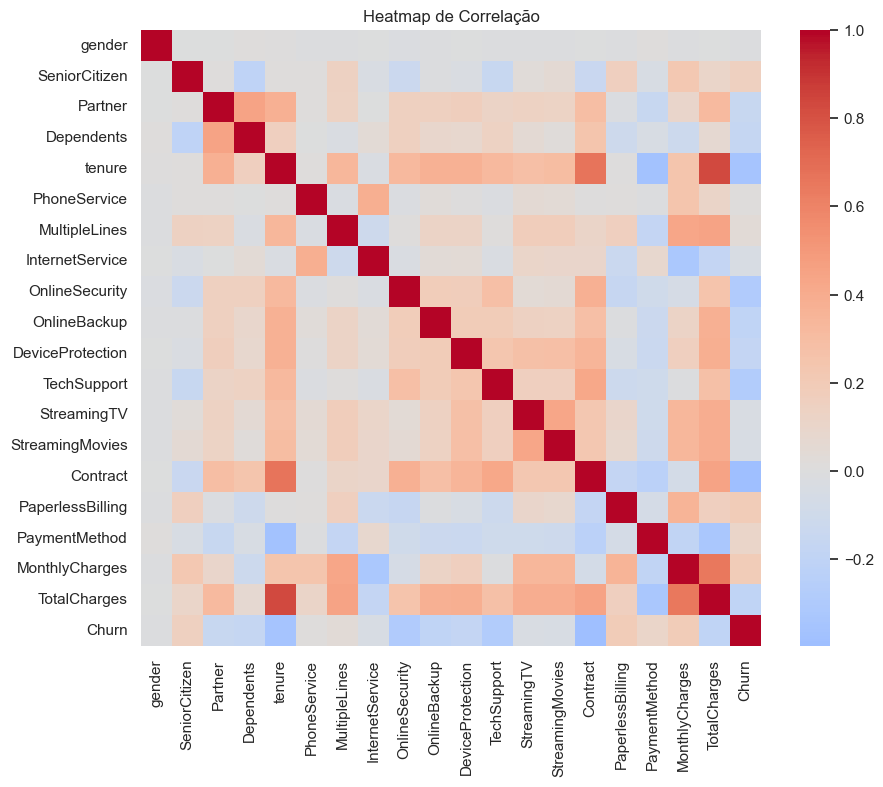

In [3284]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação
correlation_matrix = telco_df.corr()

# Correlação com a variável alvo "Churn"
target_corr = correlation_matrix["Churn"].sort_values(ascending=False)
print("Correlação das variáveis com Churn:")
print(target_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Heatmap de Correlação")
plt.show()


Importância das Variáveis:
TotalCharges        0.190900
MonthlyCharges      0.178999
tenure              0.158299
Contract            0.077508
PaymentMethod       0.051479
TechSupport         0.045127
OnlineSecurity      0.043762
InternetService     0.027714
gender              0.027378
OnlineBackup        0.026819
PaperlessBilling    0.025399
MultipleLines       0.022728
Partner             0.022676
DeviceProtection    0.021448
SeniorCitizen       0.021157
Dependents          0.019965
StreamingTV         0.017074
StreamingMovies     0.016783
PhoneService        0.004785
dtype: float64


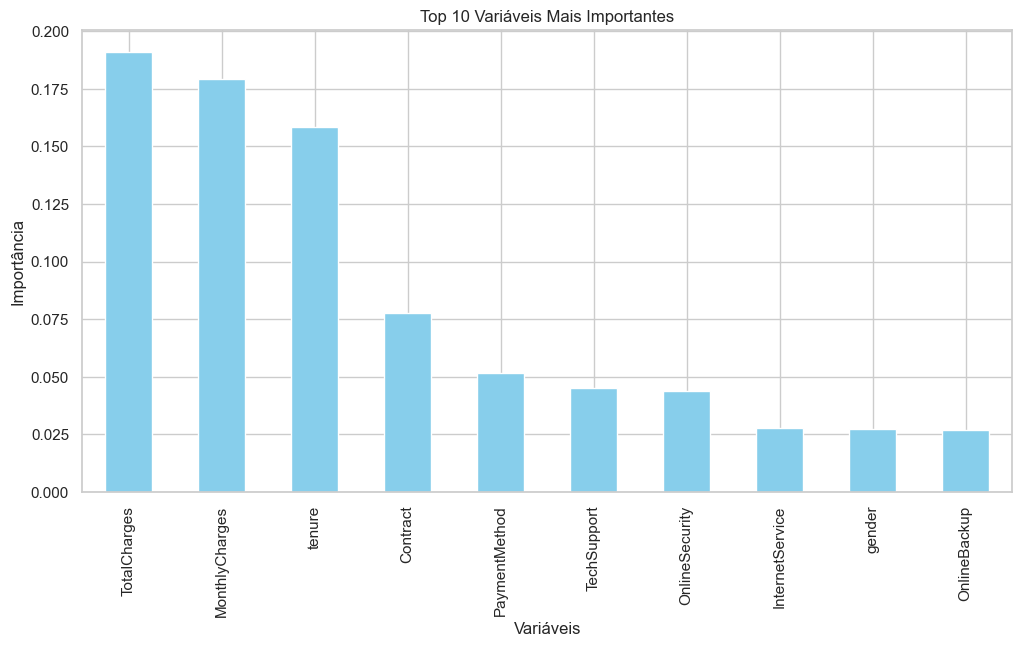

In [3285]:
from sklearn.ensemble import RandomForestClassifier

X = telco_df.drop("Churn", axis=1)
y = telco_df["Churn"]

# Treinando modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Obter a importância dos atributos
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Importância das Variáveis:")
print(feature_importances)


plt.figure(figsize=(12, 6))
feature_importances.nlargest(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Variáveis Mais Importantes")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()


In [3286]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Usar um modelo de regressão logística
logreg = LogisticRegression(max_iter=1000)

# Aplicando RFE
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Escolher 10 variáveis mais relevantes
rfe.fit(X, y)

# Visualizando Variaveis
selected_features = X.columns[rfe.support_]
print("Variáveis Selecionadas pelo RFE:")
print(selected_features)


Variáveis Selecionadas pelo RFE:
Index(['SeniorCitizen', 'tenure', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [3287]:
# Normalizar as variáveis numéricas
scaler = StandardScaler()
mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
telco_df[['PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract','MonthlyCharges' ]] = scaler.fit_transform(telco_df[['PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract','MonthlyCharges']])

print(mall_df.head())
print(telco_df.head())


   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445     -3.054010   
1       1              0        0           0  0.066327      0.327438   
2       1              0        0           0 -1.236724      0.327438   
3       1              0        0           0  0.514251     -3.054010   
4       0              0        0           0 -1.236724      0.327438   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1        -1.183234     

In [3288]:
# Label Encoding para a variável 'Gender'
mall_df['Gender'] = mall_df['Gender'].map({'Male': 0, 'Female': 1})

print(mall_df.head())

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       0 -1.424569           -1.738999               -0.434801
1           2       0 -1.281035           -1.738999                1.195704
2           3       1 -1.352802           -1.700830               -1.715913
3           4       1 -1.137502           -1.700830                1.040418
4           5       1 -0.563369           -1.662660               -0.395980


In [ ]:
# Selecionar as variáveis relevantes
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
mall_df = mall_df[selected_columns]

X = mall_df.drop('Spending Score (1-100)', axis=1)  # Variáveis independentes
y = mall_df['Spending Score (1-100)']  # Variável dependente

## Combinação dos Datasets

In [ ]:
import pandas as pd

telco_columns = ['tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges']
mall_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

telco_selected = telco_df[telco_columns]
mall_selected = mall_df[mall_columns]

# Transformação de variáveis categóricas no dataset mall_df
mall_selected['Gender'] = mall_selected['Gender'].map({'Male': 0, 'Female': 1})

# Combinação dos datasets
combined_df = pd.concat([telco_selected, mall_selected], axis=1)

print(combined_df.head())

     tenure  PhoneService  InternetService  OnlineSecurity  TechSupport  \
0 -1.277445     -3.054010        -1.183234       -0.918838    -0.925262   
1  0.066327      0.327438        -1.183234        1.407321    -0.925262   
2 -1.236724      0.327438        -1.183234        1.407321    -0.925262   
3  0.514251     -3.054010        -1.183234        1.407321     1.396299   
4 -1.236724      0.327438         0.172250       -0.918838    -0.925262   

   Contract  MonthlyCharges       Age  Annual Income (k$)  \
0 -0.828207       -1.160323 -1.424569           -1.738999   
1  0.371271       -0.259629 -1.281035           -1.738999   
2 -0.828207       -0.362660 -1.352802           -1.700830   
3  0.371271       -0.746535 -1.137502           -1.700830   
4 -0.828207        0.197365 -0.563369           -1.662660   

   Spending Score (1-100)  Gender  
0               -0.434801     NaN  
1                1.195704     NaN  
2               -1.715913     NaN  
3                1.040418     NaN  
4 

In [ ]:
# Verificandi se existe valores ausentes
print(combined_df.isnull().sum())

combined_df = combined_df.dropna()  

tenure                       0
PhoneService                 0
InternetService              0
OnlineSecurity               0
TechSupport                  0
Contract                     0
MonthlyCharges               0
Age                       6843
Annual Income (k$)        6843
Spending Score (1-100)    6843
Gender                    7043
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mall_df_selected = mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
telco_df_selected = telco_df[['tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract','MonthlyCharges' ]]

scaler = MinMaxScaler()

# Aplicando o MinMaxScaler no conjunto de dados do mall_df
mall_df_selected_scaled = scaler.fit_transform(mall_df_selected)
telco_df_selected_scaled = scaler.fit_transform(telco_df_selected)

# Convertendo o resultado de volta para DataFrame para facilitar a visualização
mall_df_scaled = pd.DataFrame(mall_df_selected_scaled, columns=mall_df_selected.columns)
telco_df_scaled = pd.DataFrame(telco_df_selected_scaled, columns=telco_df_selected.columns)

print(mall_df_scaled.head())
print(telco_df_scaled.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender
0  0.019231            0.000000                0.387755     0.0
1  0.057692            0.000000                0.816327     0.0
2  0.038462            0.008197                0.051020     1.0
3  0.096154            0.008197                0.775510     1.0
4  0.250000            0.016393                0.397959     1.0
     tenure  PhoneService  InternetService  OnlineSecurity  TechSupport  \
0  0.013889           0.0              0.0             0.0          0.0   
1  0.472222           1.0              0.0             1.0          0.0   
2  0.027778           1.0              0.0             1.0          0.0   
3  0.625000           0.0              0.0             1.0          1.0   
4  0.027778           1.0              0.5             0.0          0.0   

   Contract  MonthlyCharges  
0       0.0        0.115423  
1       0.5        0.385075  
2       0.0        0.354229  
3       0.5        0.239303  
4       0.0    

## Modelagem e Análise

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1539
           1       0.58      0.59      0.58       574

    accuracy                           0.77      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.77      0.77      0.77      2113

Matriz de Confusão:
 [[1290  249]
 [ 237  337]]
Acurácia: 0.7699952673923331
AUC-ROC: 0.8149755599477466


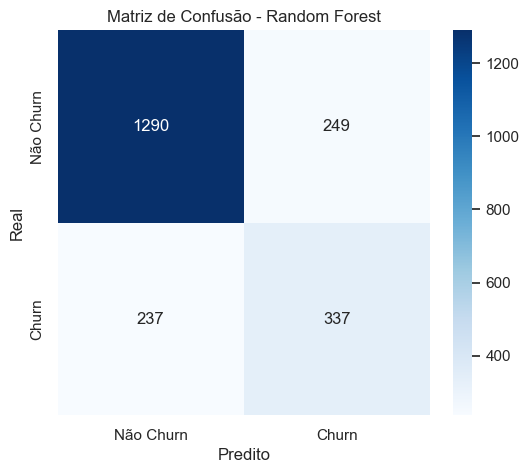

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = telco_df[['tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'gender', 'MonthlyCharges']]
y = telco_df['Churn']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciando e treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Probabilidades
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe 1 (churn)
threshold = 0.4  
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Avaliando o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_adjusted))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Acurácia:", accuracy_score(y_test, y_pred_adjusted))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))  # AUC-ROC para medir a performance

conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.60      0.72      1539
           1       0.44      0.86      0.59       574

    accuracy                           0.67      2113
   macro avg       0.68      0.73      0.65      2113
weighted avg       0.79      0.67      0.69      2113

Matriz de Confusão:
 [[917 622]
 [ 79 495]]
Acurácia: 0.6682442025556081
AUC-ROC: 0.8096290862658


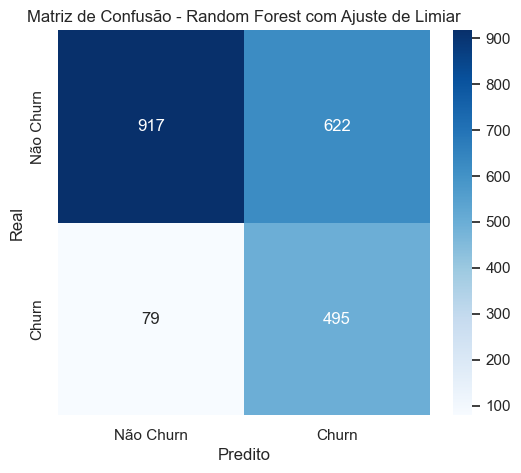

In [ ]:
from imblearn.over_sampling import SMOTE

X = telco_df[['tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'gender', 'MonthlyCharges']]
y = telco_df['Churn']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando o SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Instanciando e treinando o modelo Random Forest com class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Probabilidade
y_pred = rf_model.predict(X_test)
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe 1 (churn)

# Ajustando o limiar de decisão para aumentar o recall da classe 1
threshold = 0.2  # Testando um limiar mais baixo
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Avaliando o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_adjusted))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Acurácia:", accuracy_score(y_test, y_pred_adjusted))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))  # AUC-ROC para medir a performance

conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.title("Matriz de Confusão - Random Forest com Ajuste de Limiar")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()